 SUMMER TRAINING/INTERNSHIP   
PROJECT REPORT
(Term June-July 2025)


In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

IMPORT DATA SET 

df=pd.read_csv("Netflix Engagement Dataset.csv")

In [60]:
df=pd.read_csv("Netflix Engagement Dataset.csv")
df

,Customer ID,Subscription Length (Months),Customer Satisfaction Score (1-10),Daily Watch Time (Hours),Engagement Rate (1-10),Device Used Most Often,Genre Preference,Region,Payment History (On-Time/Delayed),Subscription Plan,Churn Status (Yes/No),Support Queries Logged,Age,Monthly Income ($),Promotional Offers Used,Number of Profiles Created
0,1,50,10,4.32,8,Mobile,Romance,Oceania,On-Time,Premium,No,9,26,3307,Yes,2
1,2,40,5,4.45,3,Smart TV,Comedy,Asia,On-Time,Premium,No,6,27,7333,Yes,2
2,3,17,8,4.81,8,Laptop,Sci-fi,South America,On-Time,Basic,No,0,55,7527,Yes,3
3,4,59,10,2.67,10,Mobile,Action,Africa,On-Time,Basic,No,1,29,9934,Yes,3
4,5,5,7,4.20,9,Smart TV,Sci-fi,North America,On-Time,Standard,No,7,45,6242,Yes,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,3496,20,4,4.82,6,Laptop,Sci-fi,Asia,On-Time,Premium,No,1,24,9508,Yes,1
3496,3497,56,8,4.48,7,Mobile,Romance,Africa,On-Time,Basic,No,2,32,9579,No,3
3497,3498,52,7,4.43,8,Tablet,Sci-fi,Oceania,On-Time,Standard,No,7,50,6914,Yes,2
3498,3499,34,5,1.11,3,Smart TV,Romance,Asia,On-Time,Basic,No,8,30,6525,Yes,3


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Customer ID                         3500 non-null   int64  
 1   Subscription Length (Months)        3500 non-null   int64  
 2   Customer Satisfaction Score (1-10)  3500 non-null   int64  
 3   Daily Watch Time (Hours)            3500 non-null   float64
 4   Engagement Rate (1-10)              3500 non-null   int64  
 5   Device Used Most Often              3500 non-null   object 
 6   Genre Preference                    3500 non-null   object 
 7   Region                              3500 non-null   object 
 8   Payment History (On-Time/Delayed)   3500 non-null   object 
 9   Subscription Plan                   3500 non-null   object 
 10  Churn Status (Yes/No)               3500 non-null   object 
 11  Support Queries Logged              3500 no

In [62]:
print(df.columns)

Index(['Customer ID', 'Subscription Length (Months)',
       'Customer Satisfaction Score (1-10)', 'Daily Watch Time (Hours)',
       'Engagement Rate (1-10)', 'Device Used Most Often', 'Genre Preference',
       'Region', 'Payment History (On-Time/Delayed)', 'Subscription Plan',
       'Churn Status (Yes/No)', 'Support Queries Logged', 'Age',
       'Monthly Income ($)', 'Promotional Offers Used',
       'Number of Profiles Created'],
      dtype='object')


In [63]:
df.describe()

,Customer ID,Subscription Length (Months),Customer Satisfaction Score (1-10),Daily Watch Time (Hours),Engagement Rate (1-10),Support Queries Logged,Age,Monthly Income ($),Number of Profiles Created
count,3500.000000,3500.0000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,1750.500000,30.5380,6.929714,3.509451,6.954286,5.023714,43.868286,5491.886857,3.018857
std,1010.507298,17.2591,2.666824,1.441229,2.671427,3.149011,15.323885,2575.005711,1.412875
min,1.000000,1.0000,1.000000,1.000000,1.000000,0.000000,18.000000,1010.000000,1.000000
25%,875.750000,16.0000,5.000000,2.250000,5.000000,2.000000,30.000000,3282.000000,2.000000
50%,1750.500000,31.0000,8.000000,3.510000,8.000000,5.000000,44.000000,5513.000000,3.000000
75%,2625.250000,45.0000,9.000000,4.740000,9.000000,8.000000,57.000000,7729.000000,4.000000
max,3500.000000,60.0000,10.000000,6.000000,10.000000,10.000000,70.000000,9990.000000,5.000000


In [64]:
df.head()

,Customer ID,Subscription Length (Months),Customer Satisfaction Score (1-10),Daily Watch Time (Hours),Engagement Rate (1-10),Device Used Most Often,Genre Preference,Region,Payment History (On-Time/Delayed),Subscription Plan,Churn Status (Yes/No),Support Queries Logged,Age,Monthly Income ($),Promotional Offers Used,Number of Profiles Created
0,1,50,10,4.32,8,Mobile,Romance,Oceania,On-Time,Premium,No,9,26,3307,Yes,2
1,2,40,5,4.45,3,Smart TV,Comedy,Asia,On-Time,Premium,No,6,27,7333,Yes,2
2,3,17,8,4.81,8,Laptop,Sci-fi,South America,On-Time,Basic,No,0,55,7527,Yes,3
3,4,59,10,2.67,10,Mobile,Action,Africa,On-Time,Basic,No,1,29,9934,Yes,3
4,5,5,7,4.20,9,Smart TV,Sci-fi,North America,On-Time,Standard,No,7,45,6242,Yes,3


In [65]:
print("Column Names as Unicode:")
print([name.encode('unicode_escape').decode('utf-8') for name in df.columns])

Column Names as Unicode:
['Customer ID', 'Subscription Length (Months)', 'Customer Satisfaction Score (1-10)', 'Daily Watch Time (Hours)', 'Engagement Rate (1-10)', 'Device Used Most Often', 'Genre Preference', 'Region', 'Payment History (On-Time/Delayed)', 'Subscription Plan', 'Churn Status (Yes/No)', 'Support Queries Logged', 'Age', 'Monthly Income ($)', 'Promotional Offers Used', 'Number of Profiles Created']


MISSING VALUE

In [67]:
missing_values = df.isnull().sum()

In [68]:
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Customer ID                           0
Subscription Length (Months)          0
Customer Satisfaction Score (1-10)    0
Daily Watch Time (Hours)              0
Engagement Rate (1-10)                0
Device Used Most Often                0
Genre Preference                      0
Region                                0
Payment History (On-Time/Delayed)     0
Subscription Plan                     0
Churn Status (Yes/No)                 0
Support Queries Logged                0
Age                                   0
Monthly Income ($)                    0
Promotional Offers Used               0
Number of Profiles Created            0
dtype: int64


In [69]:
df.shape

(3500, 16)

In [70]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
missing_values = df.isnull().sum()

In [71]:
churn_counts = df['Churn Status (Yes/No)'].value_counts()

In [72]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).drop(columns=['Customer ID'])
summary_stats = numerical_features.describe()

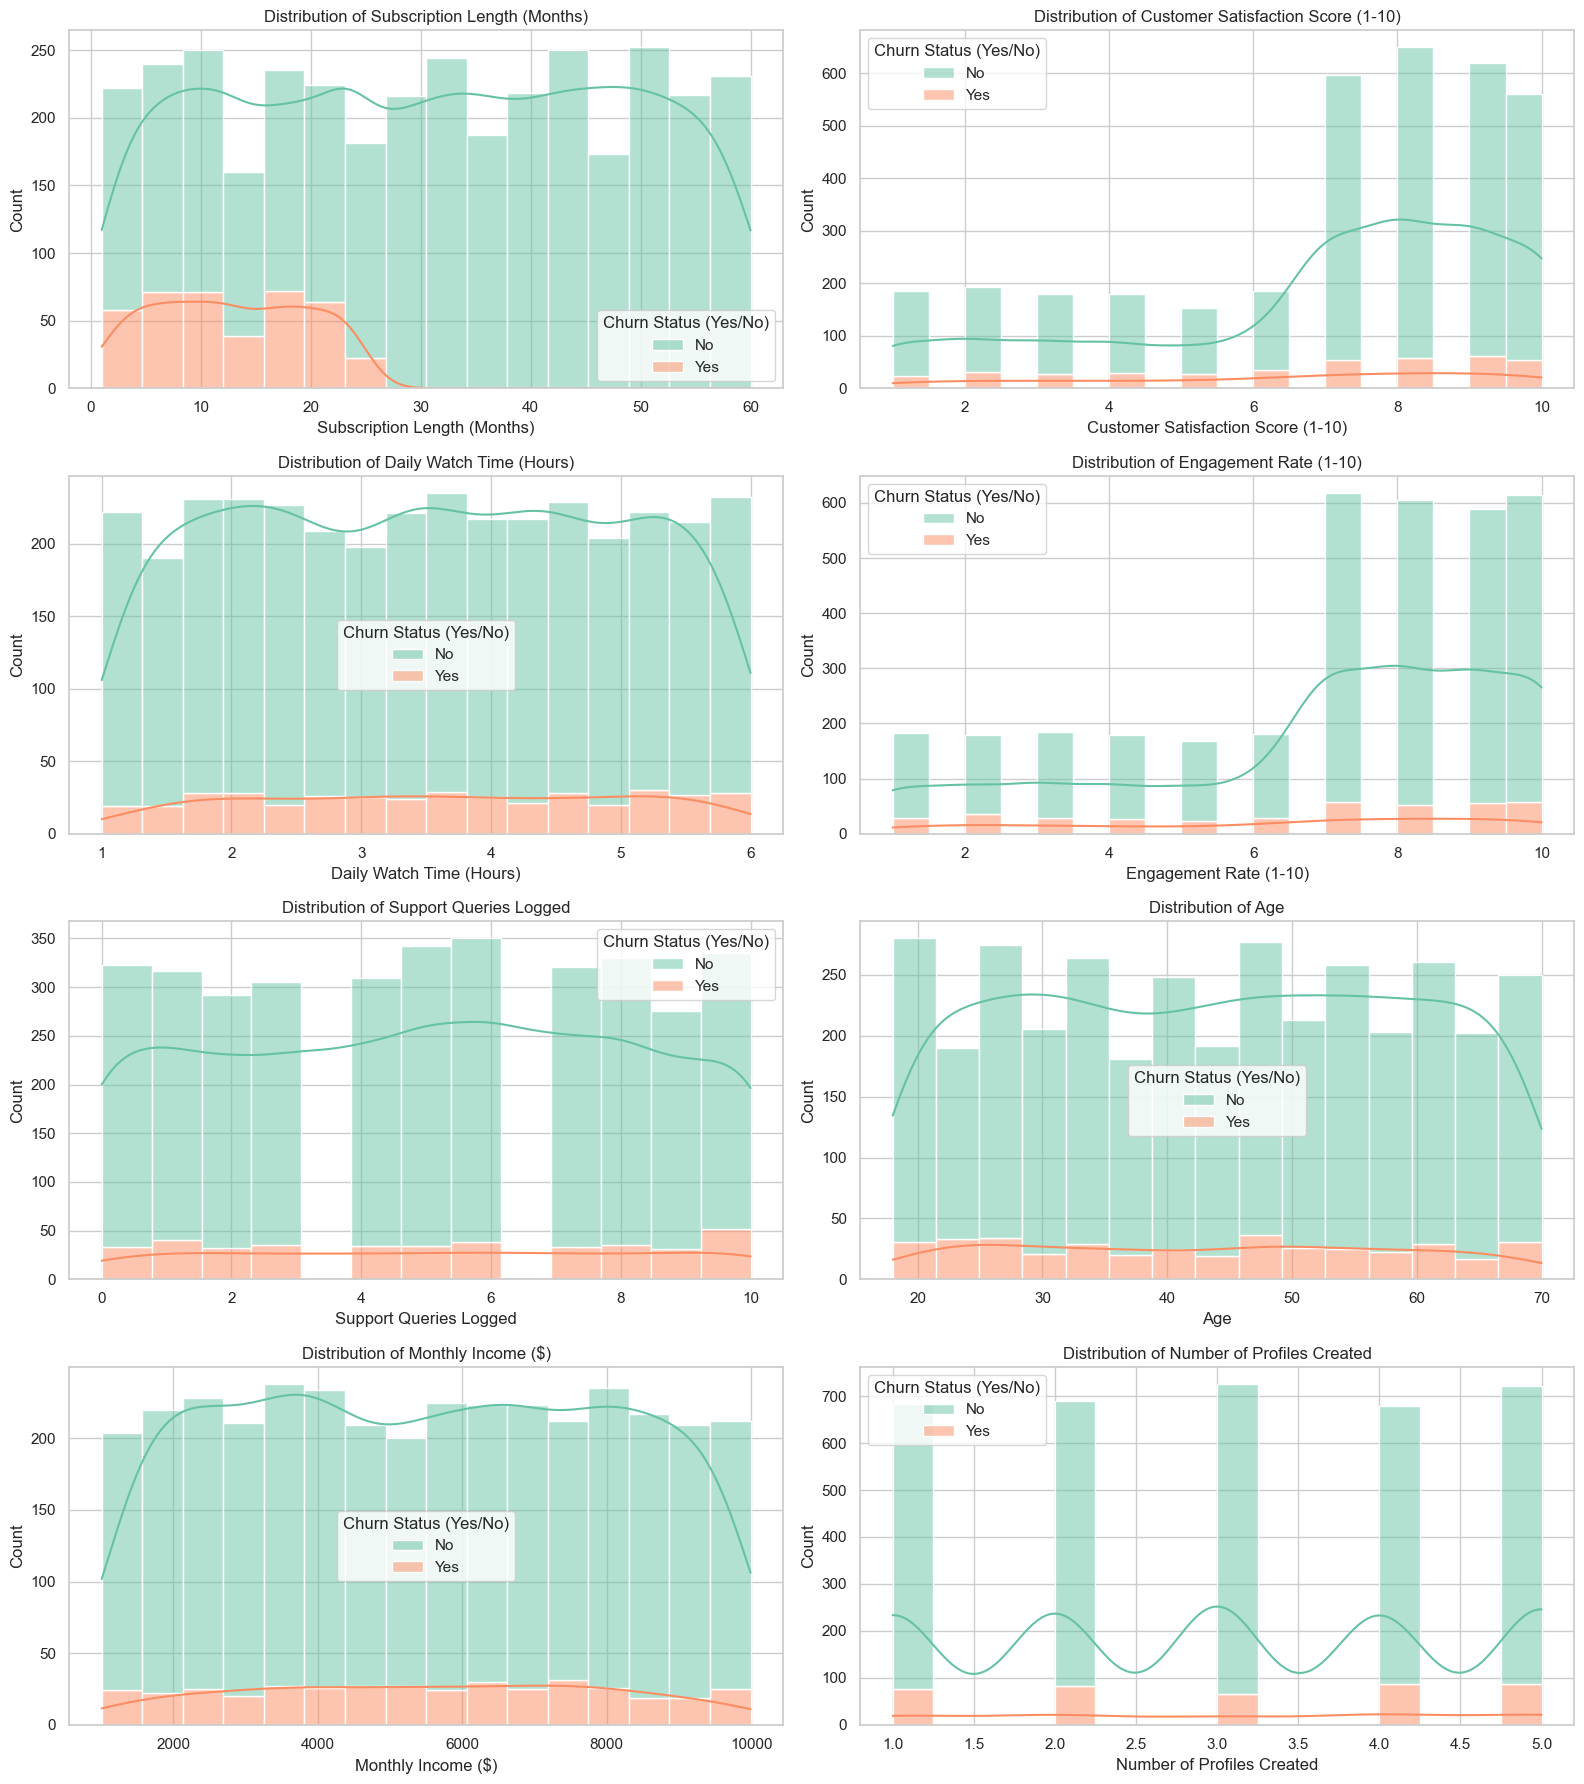

In [73]:
num_cols = numerical_features.columns
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 18))
axes = axes.flatten()
for i, col in enumerate(num_cols):
    sns.histplot(data=df, x=col, kde=True, ax=axes[i], hue='Churn Status (Yes/No)', multiple="stack", palette="Set2")
    axes[i].set_title(f'Distribution of {col}')
plt.tight_layout()

In [291]:

missing_values, churn_counts, summary_stats

(Customer ID                           0
 Subscription Length (Months)          0
 Customer Satisfaction Score (1-10)    0
 Daily Watch Time (Hours)              0
 Engagement Rate (1-10)                0
 Device Used Most Often                0
 Genre Preference                      0
 Region                                0
 Payment History (On-Time/Delayed)     0
 Subscription Plan                     0
 Churn Status (Yes/No)                 0
 Support Queries Logged                0
 Age                                   0
 Monthly Income ($)                    0
 Promotional Offers Used               0
 Number of Profiles Created            0
 dtype: int64,
 Churn Status (Yes/No)
 No     3103
 Yes     397
 Name: count, dtype: int64,
        Subscription Length (Months)  Customer Satisfaction Score (1-10)  \
 count                     3500.0000                         3500.000000   
 mean                        30.5380                            6.929714   
 std                    

In [75]:
numerical_cols = df.select_dtypes(include=['number']).columns
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

In [76]:
outliers = ((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR)))

In [77]:
outlier_percentage = outliers.sum() / df.shape[0] * 100
print("Percentage of Outliers in Each Column:")
print(outlier_percentage)

Percentage of Outliers in Each Column:
Customer ID                           0.0
Subscription Length (Months)          0.0
Customer Satisfaction Score (1-10)    0.0
Daily Watch Time (Hours)              0.0
Engagement Rate (1-10)                0.0
Support Queries Logged                0.0
Age                                   0.0
Monthly Income ($)                    0.0
Number of Profiles Created            0.0
dtype: float64


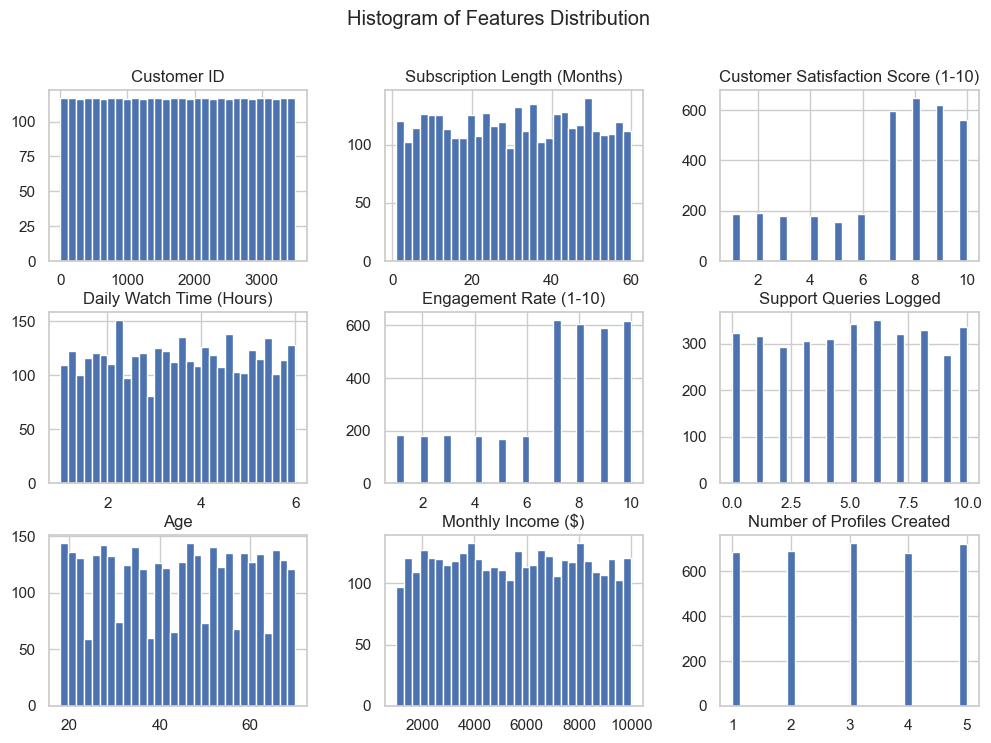

In [78]:
df[numerical_cols].hist(figsize=(12, 8), bins=30)
plt.suptitle("Histogram of Features Distribution")
plt.show()

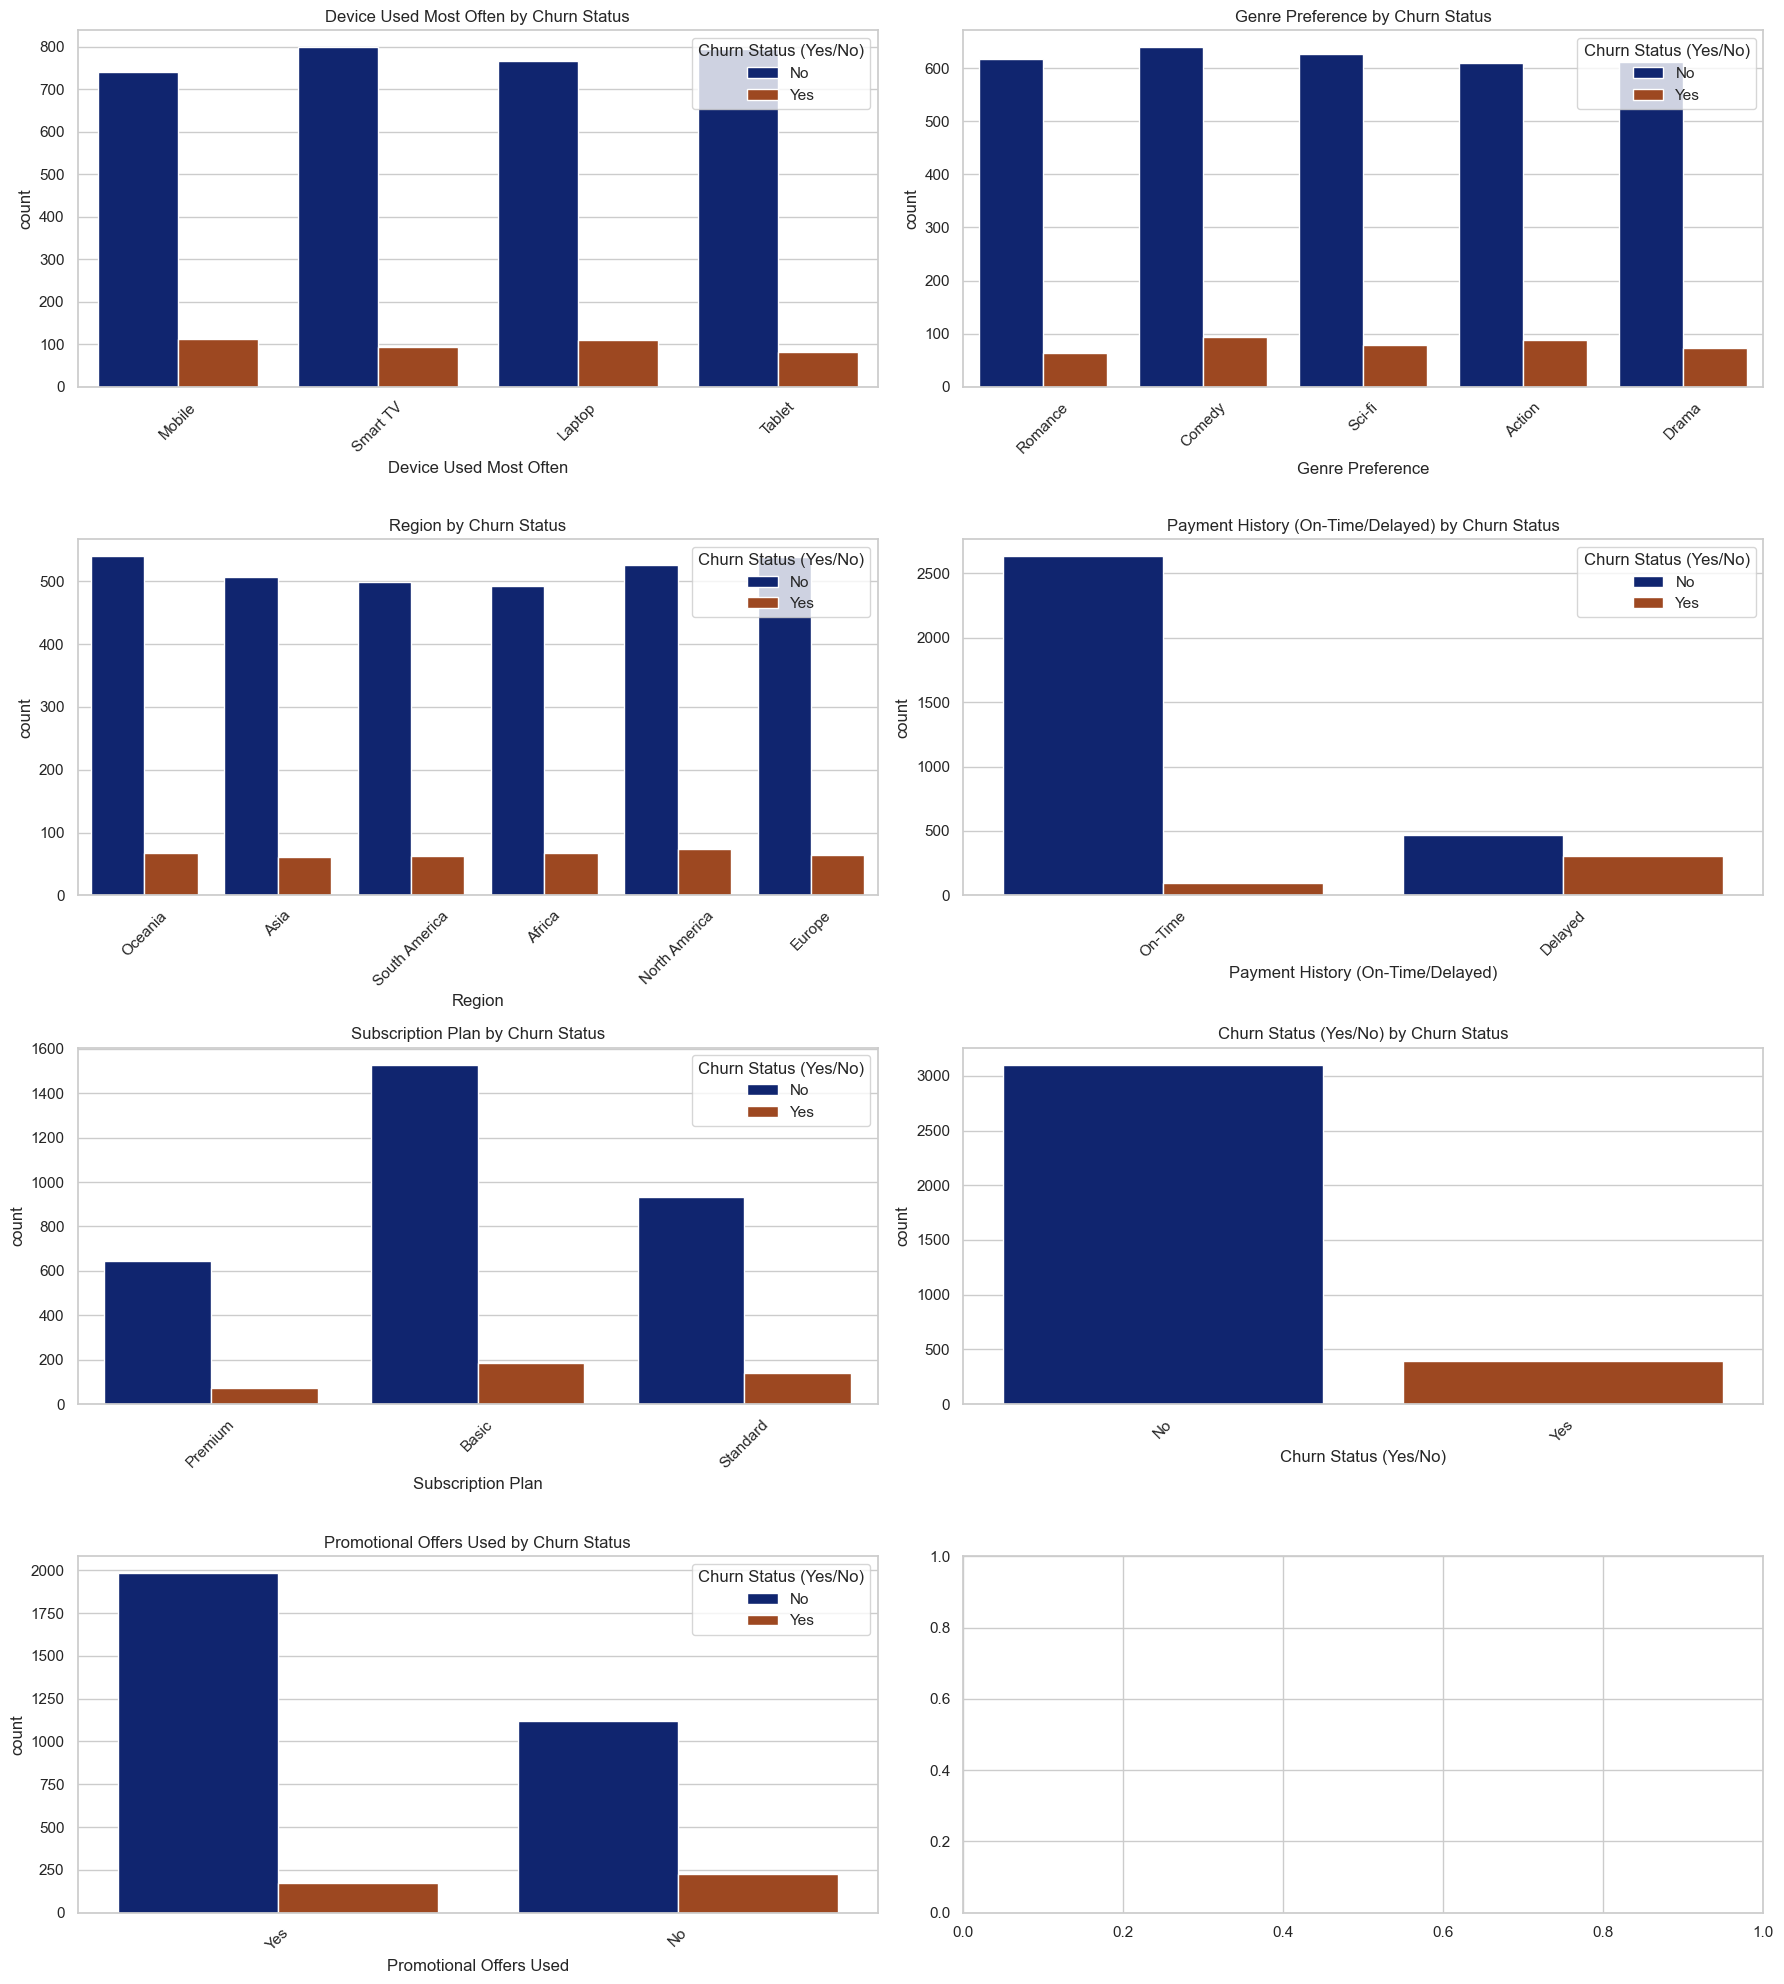

In [79]:
categorical_cols = [
    'Device Used Most Often', 'Genre Preference', 'Region',
    'Payment History (On-Time/Delayed)', 'Subscription Plan',
    'Churn Status (Yes/No)', 'Promotional Offers Used'
]
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(18, 20))
axes = axes.flatten()
for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, hue='Churn Status (Yes/No)', ax=axes[i], palette='dark')
    axes[i].set_title(f'{col} by Churn Status')
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

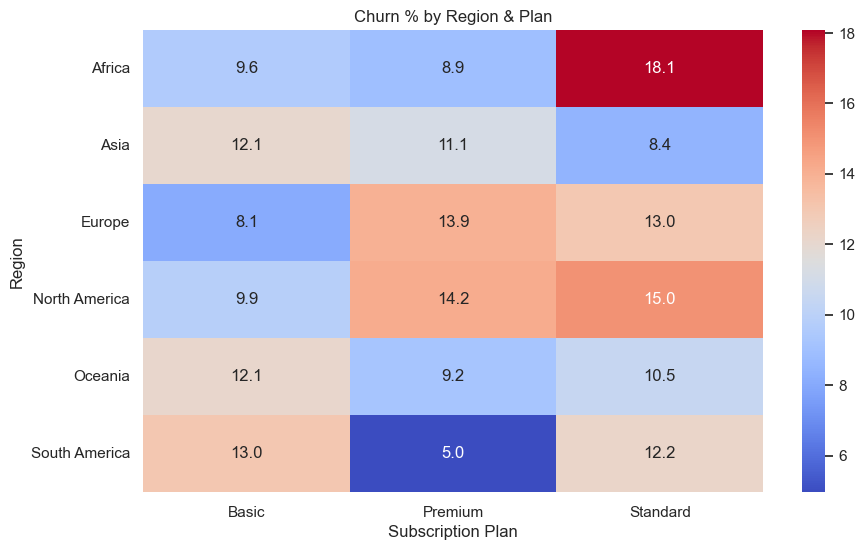

In [92]:
df['Churn_Status_Binary'] = df['Churn Status (Yes/No)'].map({'Yes': 1, 'No': 0})
heatmap_data = pd.crosstab(
    df['Region'],
    df['Subscription Plan'],
    values=df['Churn_Status_Binary'],
    aggfunc='mean'
)
sns.heatmap(heatmap_data * 100, annot=True, fmt=".1f", cmap='coolwarm')
plt.title("Churn % by Region & Plan")
plt.ylabel("Region")
plt.xlabel("Subscription Plan")
plt.show()

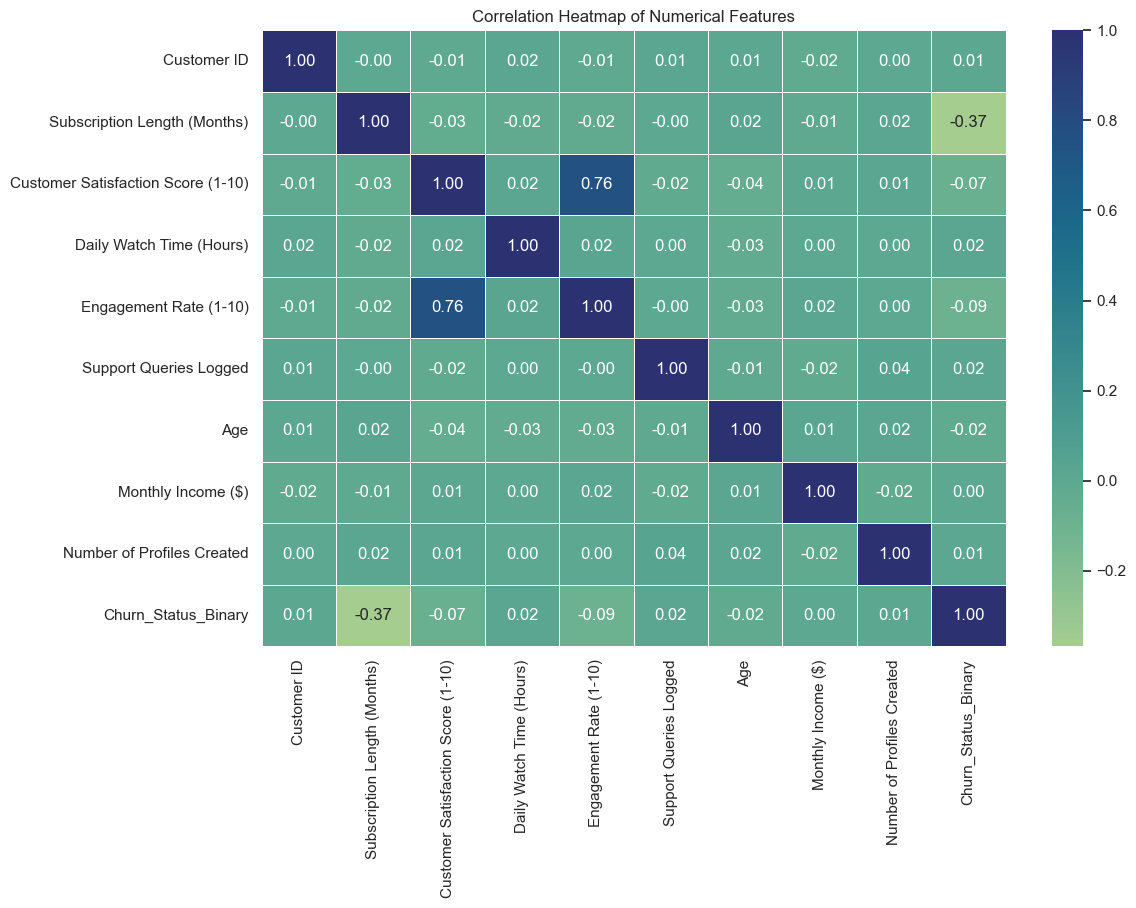

In [94]:
plt.figure(figsize=(12, 8))
corr_matrix = df.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='crest', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

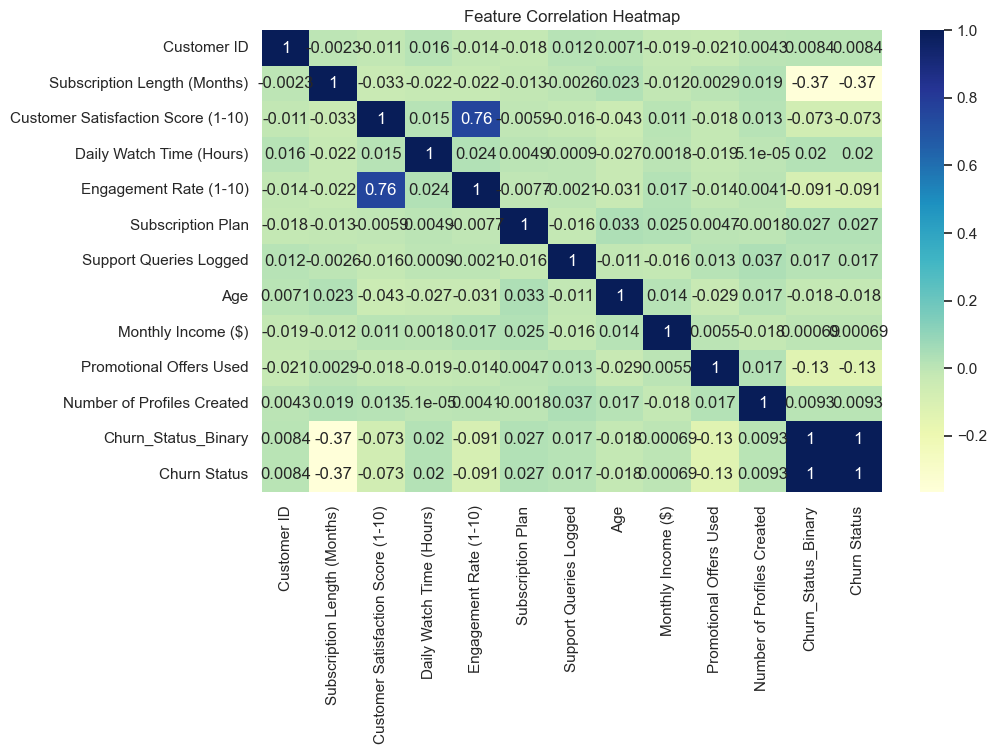

In [189]:
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, cmap='YlGnBu')
plt.title("Feature Correlation Heatmap")
plt.show()

C:\Users\ankit\AppData\Local\Temp\ipykernel_13392\984335348.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn Status (Yes/No)', y=col, palette='dark')


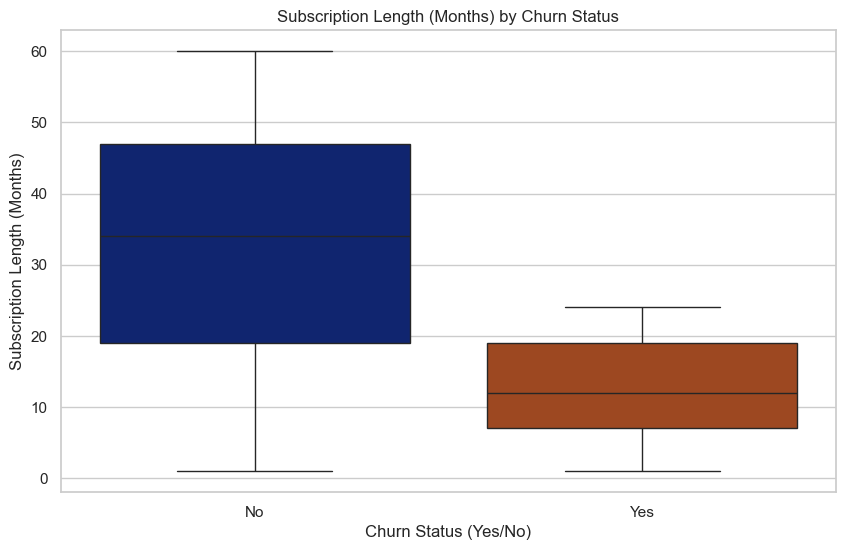

ValueError: Could not interpret value `Customer Satisfaction Score` for `y`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

In [96]:
df.columns = df.columns.str.strip()
num_cols = [
    'Subscription Length (Months)', 'Customer Satisfaction Score',
    'Daily Watch Time (Hours)', 'Engagement Rate',
    'Support Queries Logged', 'Monthly Income ($)', 'Age'
]
for col in num_cols:
    plt.figure()
    sns.boxplot(data=df, x='Churn Status (Yes/No)', y=col, palette='dark')
    plt.title(f'{col} by Churn Status')
    plt.show()

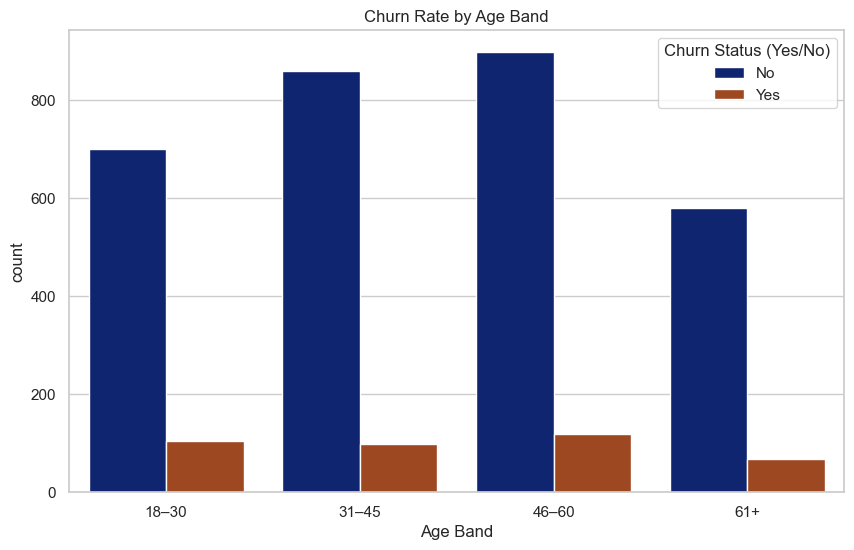

In [98]:
df['Age Band'] = pd.cut(df['Age'], bins=[18, 30, 45, 60, 80], labels=['18–30', '31–45', '46–60', '61+'])
plt.figure()
sns.countplot(data=df, x='Age Band', hue='Churn Status (Yes/No)', palette='dark')
plt.title('Churn Rate by Age Band')
plt.show()

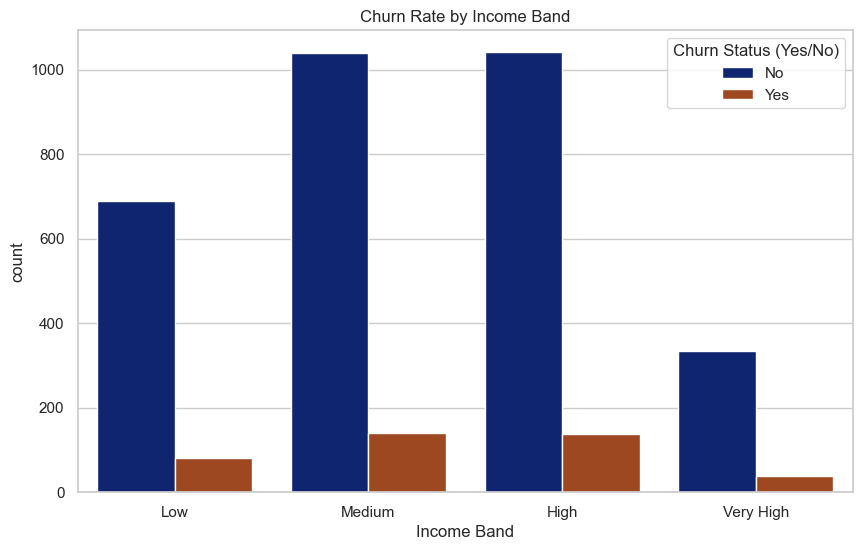

In [100]:
df['Income Band'] = pd.cut(df['Monthly Income ($)'], bins=[1000, 3000, 6000, 9000, 11000], labels=['Low', 'Medium', 'High', 'Very High'])
plt.figure()
sns.countplot(data=df, x='Income Band', hue='Churn Status (Yes/No)', palette='dark')
plt.title('Churn Rate by Income Band')
plt.show()

In [102]:
segment_table = df.groupby(['Subscription Plan', 'Payment History (On-Time/Delayed)', 'Churn Status (Yes/No)'])['Customer ID'].count().unstack().fillna(0)
segment_table['Churn Rate %'] = (segment_table['Yes'] / segment_table.sum(axis=1)) * 100
print(segment_table)

Churn Status (Yes/No)                                    No    Yes  \
Subscription Plan Payment History (On-Time/Delayed)                  
Basic             Delayed                             234.0  134.0   
                  On-Time                            1295.0   51.0   
Premium           Delayed                              99.0   74.0   
                  On-Time                             544.0    0.0   
Standard          Delayed                             136.0   94.0   
                  On-Time                             795.0   44.0   

Churn Status (Yes/No)                                Churn Rate %  
Subscription Plan Payment History (On-Time/Delayed)                
Basic             Delayed                               36.413043  
                  On-Time                                3.789004  
Premium           Delayed                               42.774566  
                  On-Time                                0.000000  
Standard          Delayed      

<Figure size 800x500 with 0 Axes>

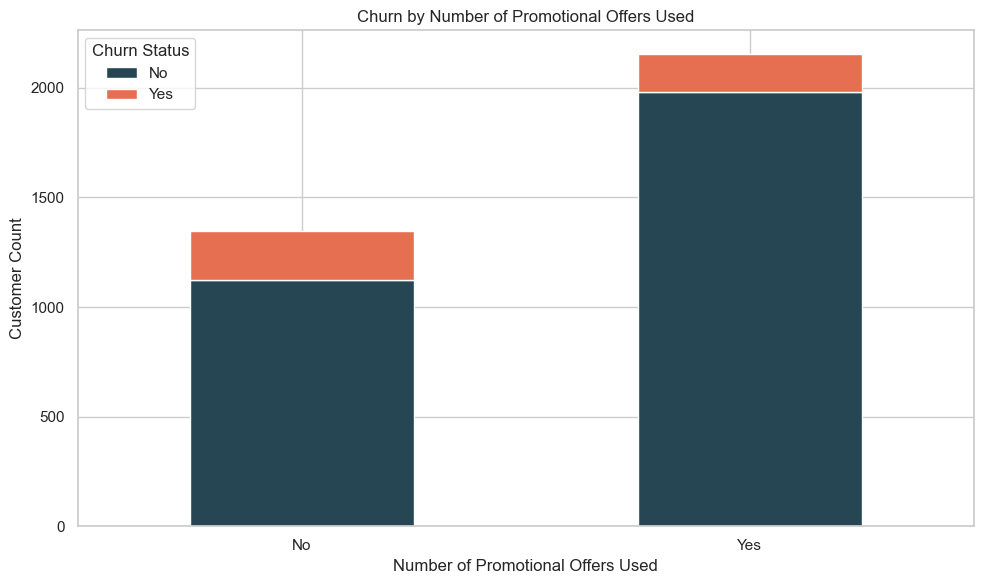

In [104]:
plt.figure(figsize=(8, 5))
promo_plot = df.groupby(['Promotional Offers Used', 'Churn Status (Yes/No)']).size().unstack().fillna(0)
promo_plot.plot(kind='bar', stacked=True, color=['#264653', '#e76f51'])
plt.title('Churn by Number of Promotional Offers Used')
plt.xlabel('Number of Promotional Offers Used')
plt.ylabel('Customer Count')
plt.legend(title='Churn Status')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

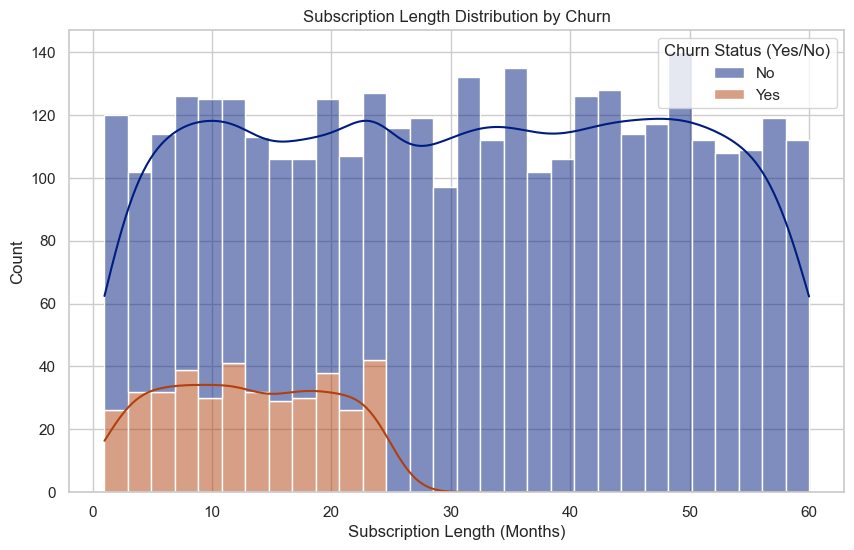

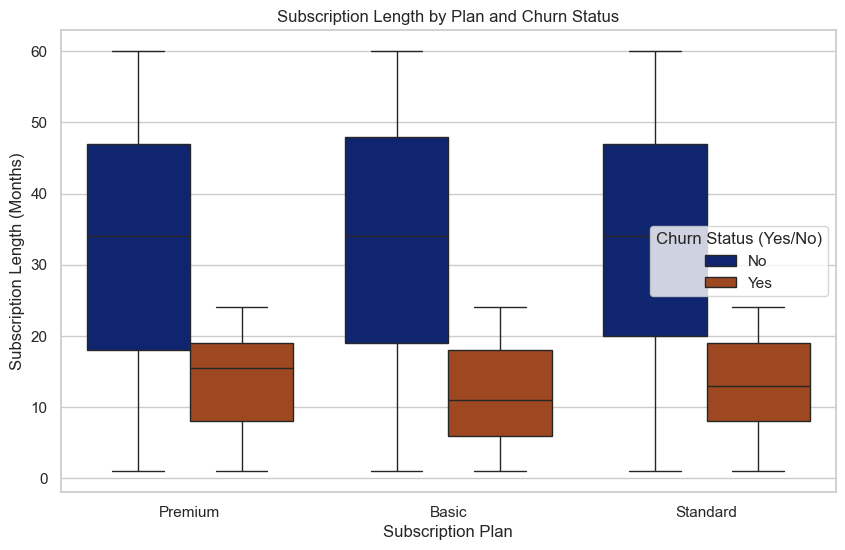

In [106]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Subscription Length (Months)', hue='Churn Status (Yes/No)', multiple='stack', kde=True, palette='dark', bins=30)
plt.title("Subscription Length Distribution by Churn")
plt.show()
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Subscription Plan', y='Subscription Length (Months)', hue='Churn Status (Yes/No)', palette='dark')
plt.title("Subscription Length by Plan and Churn Status")
plt.show()

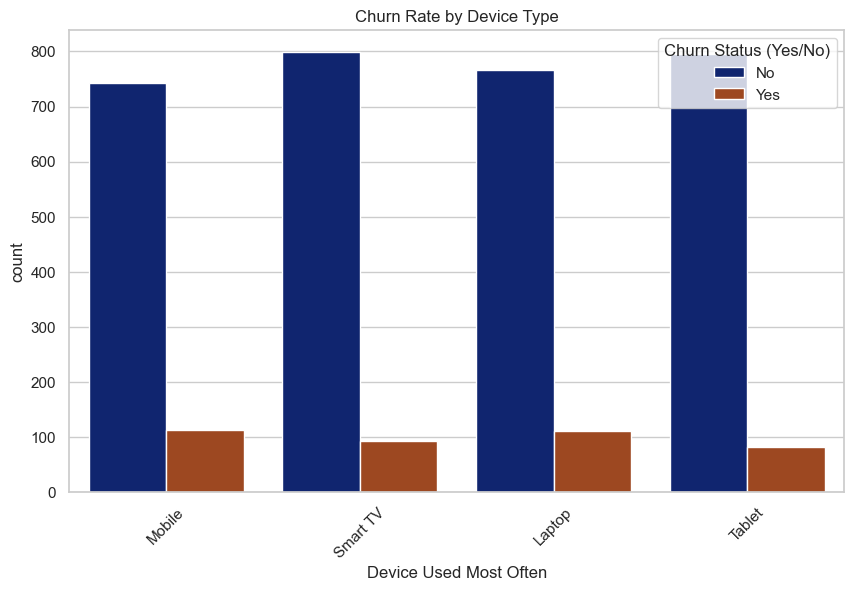

In [108]:
sns.countplot(data=df, x='Device Used Most Often', hue='Churn Status (Yes/No)', palette='dark')
plt.title("Churn Rate by Device Type")
plt.xticks(rotation=45)
plt.show()

C:\Users\ankit\AppData\Local\Temp\ipykernel_13392\493215590.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn Status (Yes/No)', data=df, palette='coolwarm')


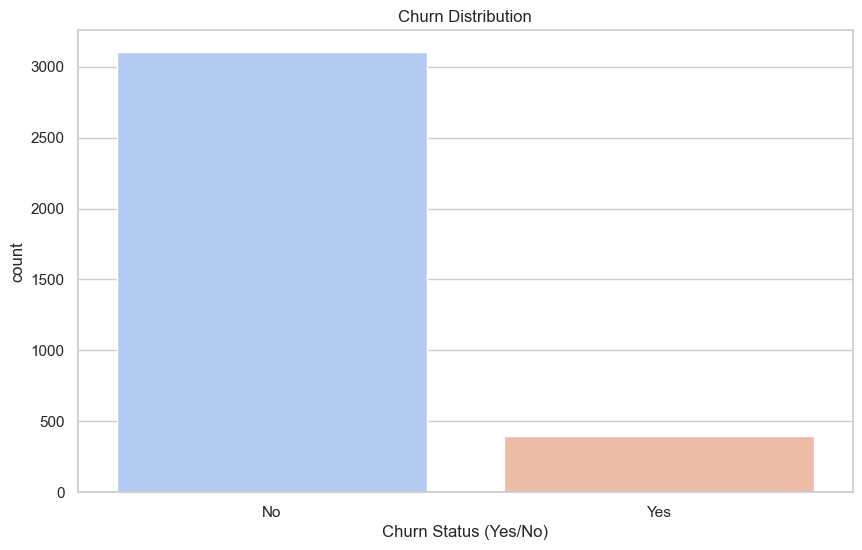

In [110]:
sns.countplot(x='Churn Status (Yes/No)', data=df, palette='coolwarm')
plt.title('Churn Distribution')
plt.show()

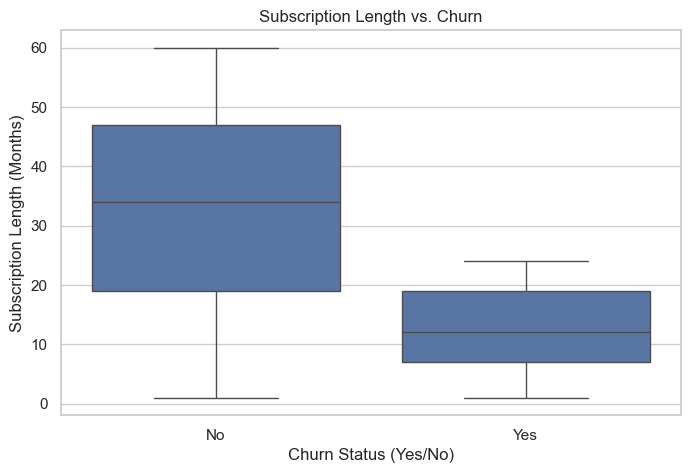

In [112]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Churn Status (Yes/No)", y="Subscription Length (Months)", data=df)
plt.title("Subscription Length vs. Churn")
plt.show()

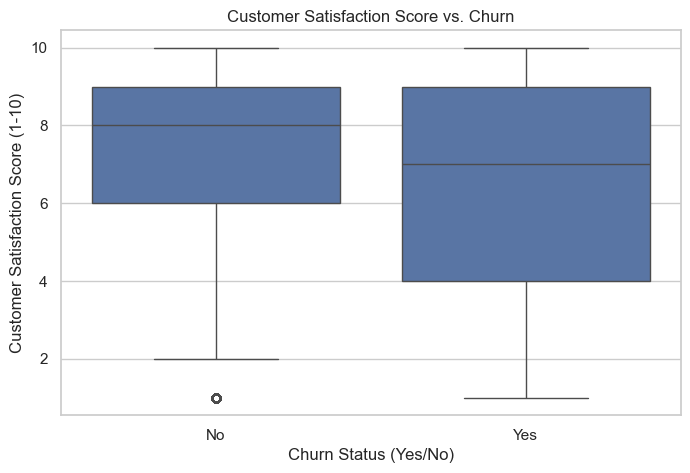

In [114]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Churn Status (Yes/No)", y="Customer Satisfaction Score (1-10)", data=df)
plt.title("Customer Satisfaction Score vs. Churn")
plt.show()

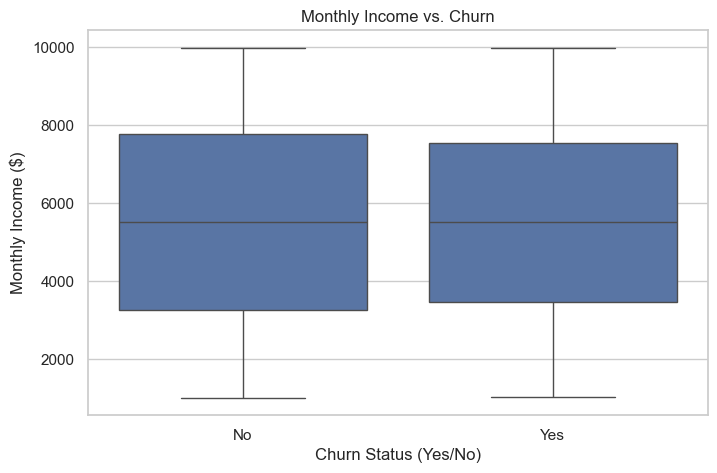

In [116]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Churn Status (Yes/No)", y="Monthly Income ($)", data=df)
plt.title("Monthly Income vs. Churn")
plt.show()

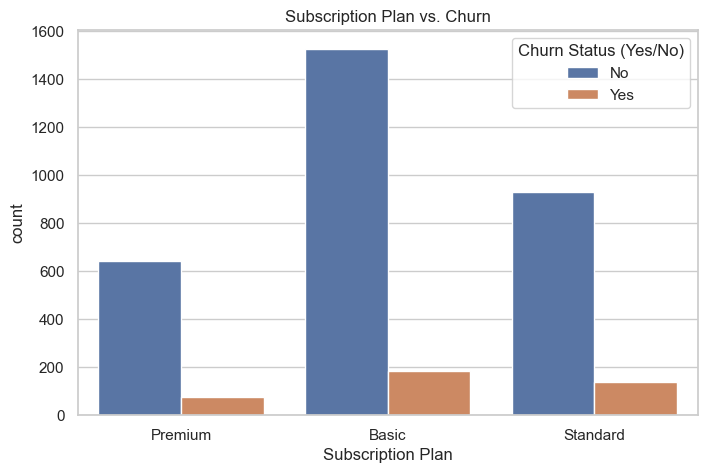

In [118]:
plt.figure(figsize=(8, 5))
sns.countplot(x="Subscription Plan", hue="Churn Status (Yes/No)", data=df)
plt.title("Subscription Plan vs. Churn")
plt.show()

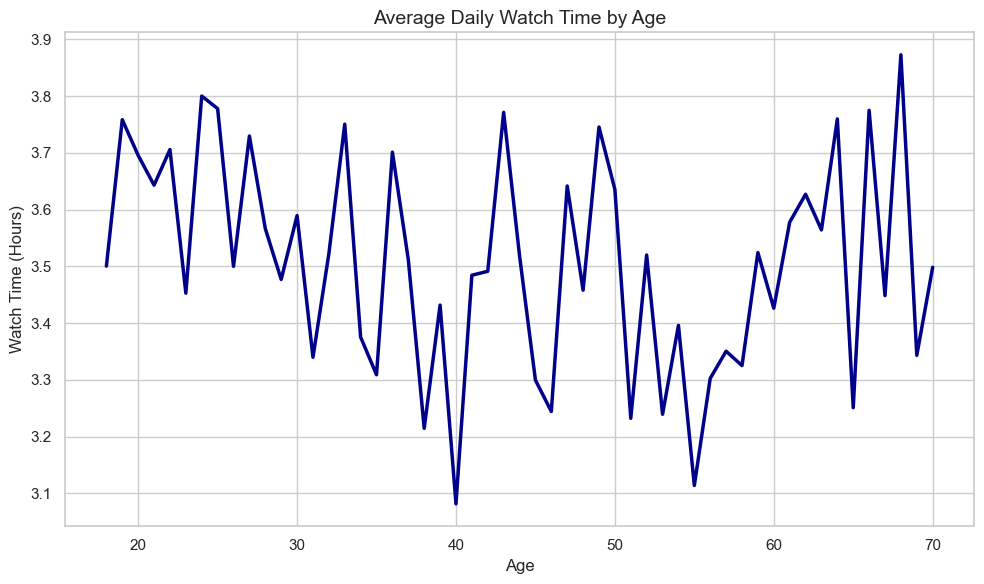

In [180]:
watch_time_by_age = df.groupby('Age')['Daily Watch Time (Hours)'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=watch_time_by_age, x='Age', y='Daily Watch Time (Hours)', color='darkblue', linewidth=2.5)
plt.title("Average Daily Watch Time by Age", fontsize=14)
plt.xlabel("Age")
plt.ylabel("Watch Time (Hours)")
plt.grid(True)
plt.tight_layout()
plt.show()

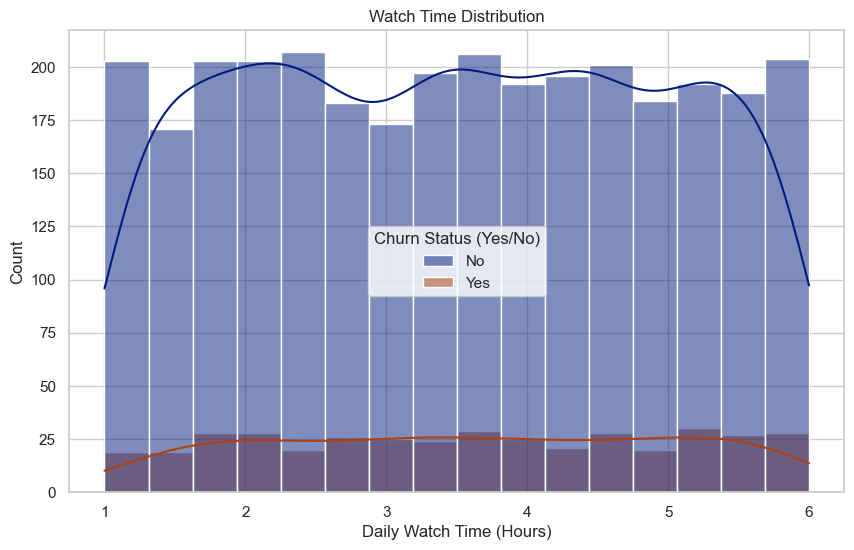

In [182]:
sns.histplot(data=df, x='Daily Watch Time (Hours)', hue='Churn Status (Yes/No)', kde=True, palette='dark')
plt.title("Watch Time Distribution")
plt.show()

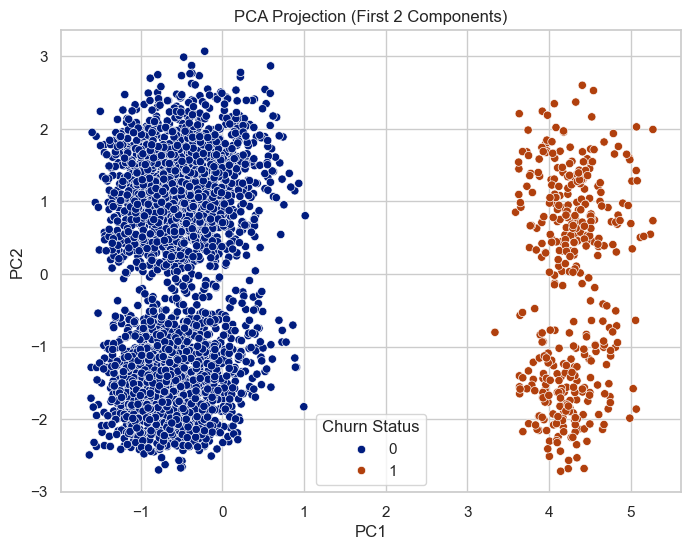

In [185]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Churn Status'], palette='dark')
plt.title("PCA Projection (First 2 Components)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

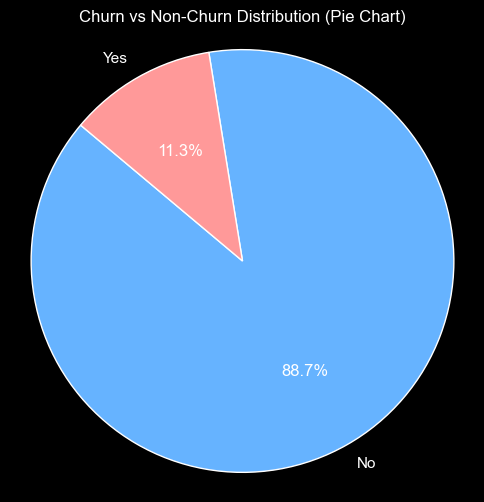

In [281]:
df = pd.read_csv("Netflix Engagement Dataset.csv")  # Your correct path
df.columns = df.columns.str.strip()  # Remove extra spaces
churn_counts = df['Churn Status (Yes/No)'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(
    churn_counts, 
    labels=churn_counts.index, 
    autopct='%1.1f%%', 
    colors=['#66b3ff', '#ff9999'], 
    startangle=140
)
plt.title('Churn vs Non-Churn Distribution (Pie Chart)')
plt.axis('equal')
plt.show()


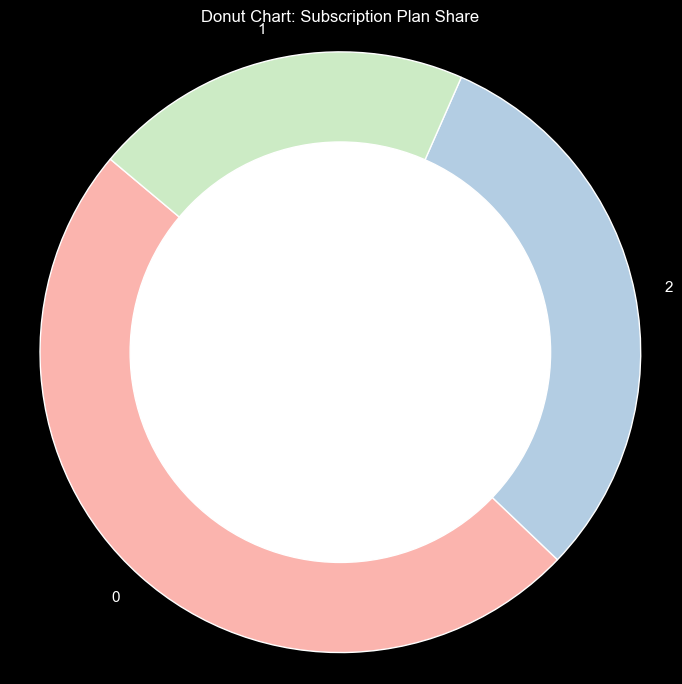

In [273]:
plan_counts = df['Subscription Plan'].value_counts()
plt.figure(figsize=(7, 7))
plt.pie(plan_counts, labels=plan_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors, wedgeprops=dict(width=0.4))
plt.title('Donut Chart: Subscription Plan Share')
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)
plt.axis('equal')
plt.tight_layout()
plt.show()


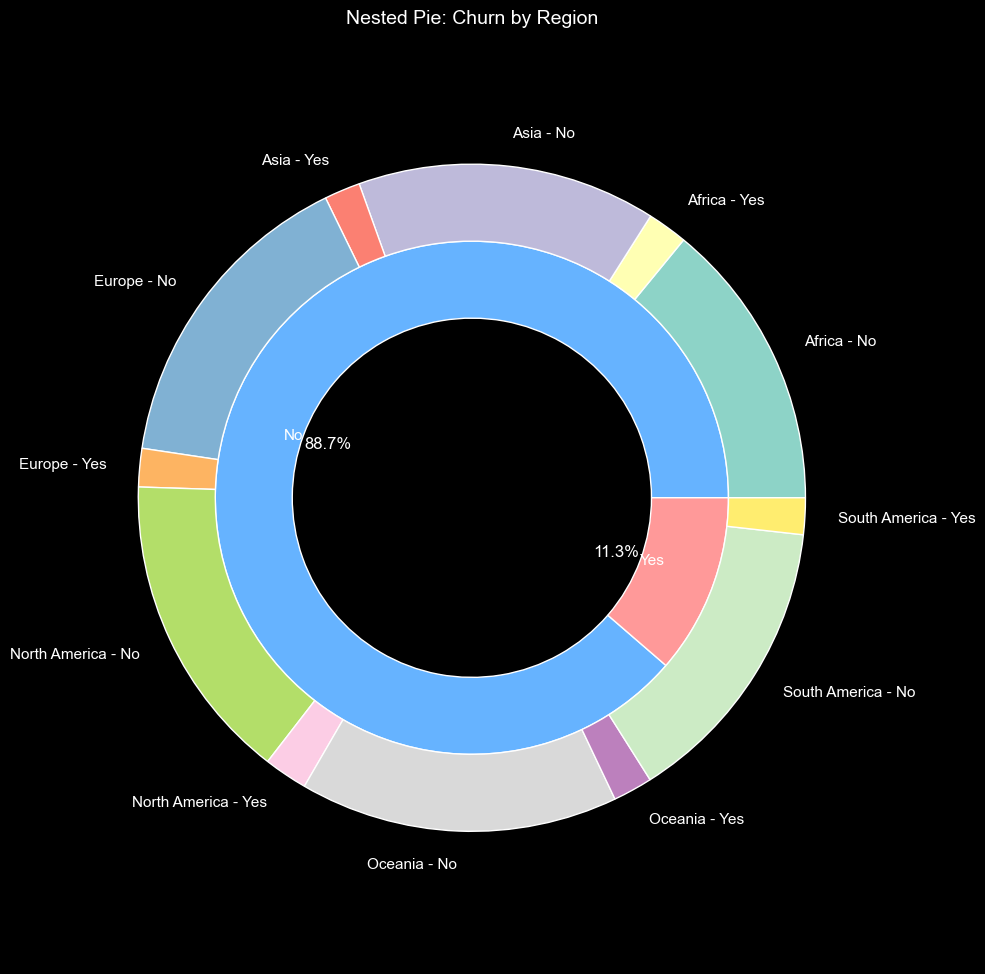

In [283]:
import matplotlib.pyplot as plt
from itertools import cycle
df.columns = df.columns.str.strip()
churn_inner = df['Churn Status (Yes/No)'].value_counts()
region_churn = df.groupby(['Region', 'Churn Status (Yes/No)']).size().unstack().fillna(0)
inner_colors = ['#66b3ff', '#ff9999']
outer_colors = list(plt.cm.Set3.colors) * 2  # Repeat to match total segments

plt.figure(figsize=(10, 10))
plt.pie(
    churn_inner, 
    radius=1, 
    labels=churn_inner.index, 
    labeldistance=0.7, 
    autopct='%1.1f%%',
    colors=inner_colors, 
    wedgeprops=dict(width=0.3)
)
outer_vals = region_churn.values.flatten()
outer_labels = [f"{region} - {status}" for region in region_churn.index for status in region_churn.columns]

plt.pie(
    outer_vals, 
    radius=1.3, 
    labels=outer_labels, 
    labeldistance=1.1, 
    colors=outer_colors[:len(outer_vals)],
    wedgeprops=dict(width=0.3)
)
plt.title("Nested Pie: Churn by Region", fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show()


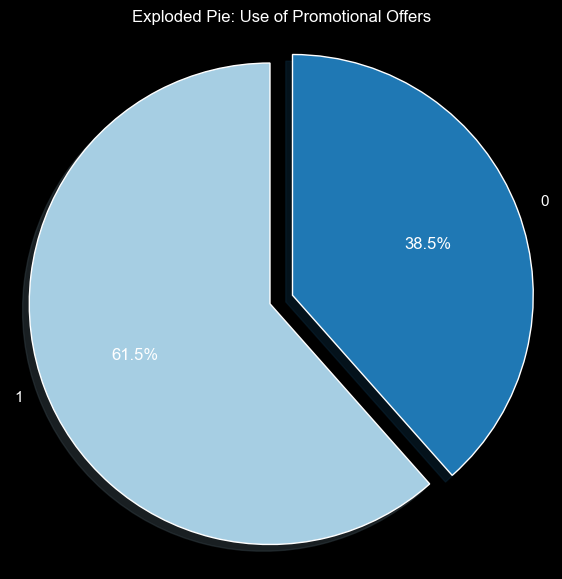

In [277]:
offer_counts = df['Promotional Offers Used'].value_counts()
explode = [0.1 if i == offer_counts.idxmax() else 0 for i in offer_counts.index]
plt.figure(figsize=(7, 7))
plt.pie(offer_counts, labels=offer_counts.index, autopct='%1.1f%%', startangle=90,
        explode=explode, shadow=True, colors=plt.cm.Paired.colors)
plt.title('Exploded Pie: Use of Promotional Offers')
plt.axis('equal')
plt.show()


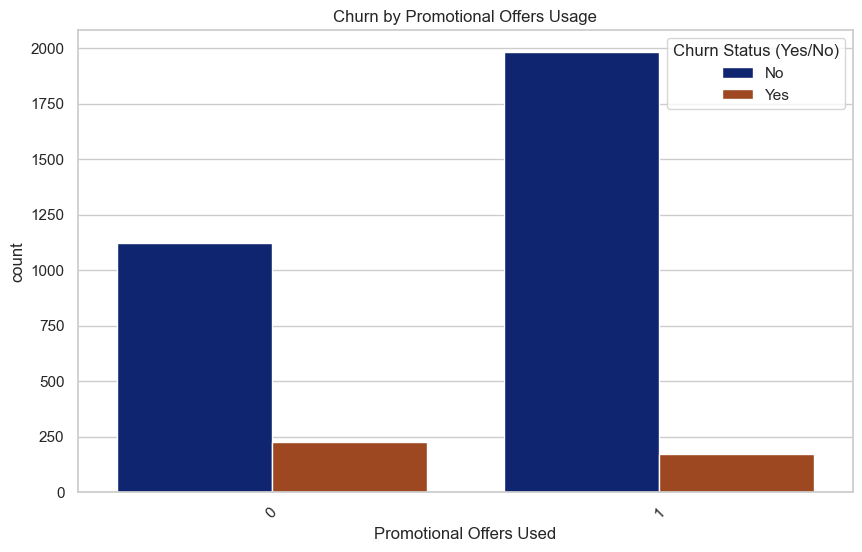

In [187]:
sns.countplot(data=df, x='Promotional Offers Used', hue='Churn Status (Yes/No)', palette='dark')
plt.title("Churn by Promotional Offers Usage")
plt.xticks(rotation=45)
plt.show()


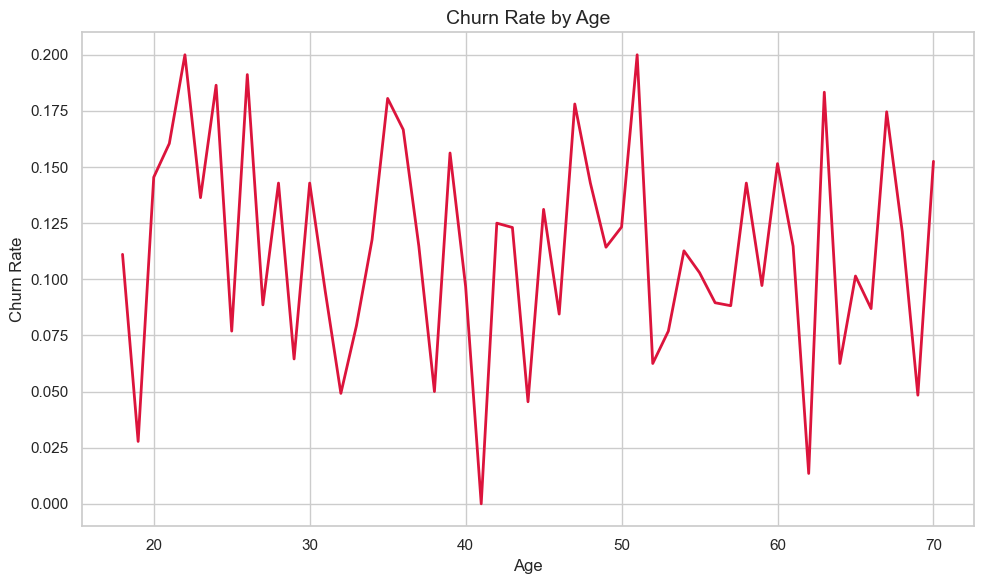

In [191]:
df['Churn_Status_Binary'] = df['Churn Status (Yes/No)'].map({'Yes': 1, 'No': 0})
churn_by_age = df.groupby('Age')['Churn_Status_Binary'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=churn_by_age, x='Age', y='Churn_Status_Binary', color='crimson', linewidth=2)
plt.title("Churn Rate by Age", fontsize=14)
plt.xlabel("Age")
plt.ylabel("Churn Rate")
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\ankit\AppData\Local\Temp\ipykernel_13392\3017574087.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  watch_by_age_group = df.groupby('Age Group')['Daily Watch Time (Hours)'].mean().reset_index()


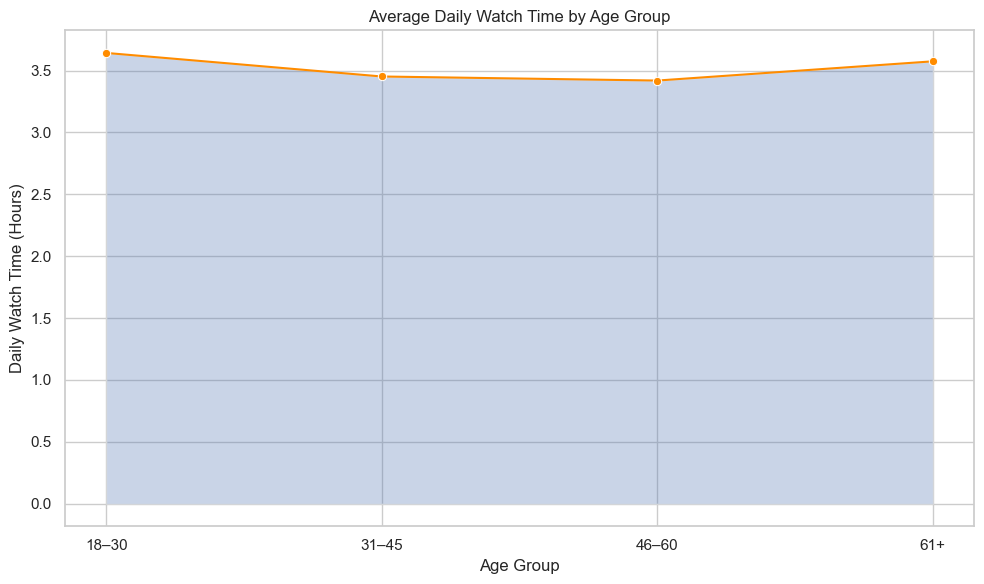

In [205]:
# Create Age Bins
df['Age Group'] = pd.cut(df['Age'], bins=[18, 30, 45, 60, 80], labels=['18–30', '31–45', '46–60', '61+'])

watch_by_age_group = df.groupby('Age Group')['Daily Watch Time (Hours)'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=watch_by_age_group, x='Age Group', y='Daily Watch Time (Hours)', marker='o', color='darkorange')
plt.fill_between(watch_by_age_group['Age Group'].astype(str), watch_by_age_group['Daily Watch Time (Hours)'], alpha=0.3)
plt.title("Average Daily Watch Time by Age Group")
plt.grid(True)
plt.tight_layout()
plt.show()


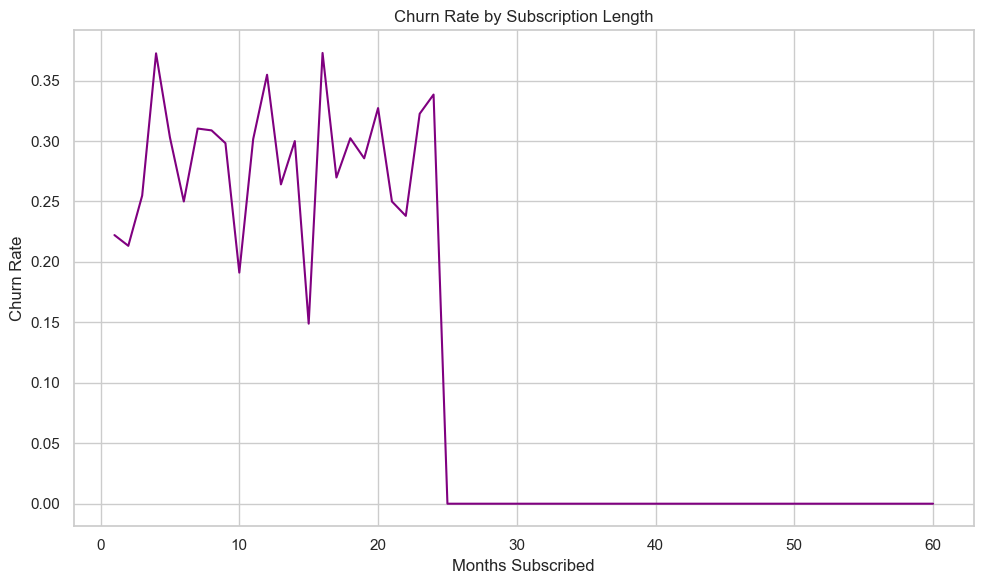

In [207]:
df['Churn_Status_Binary'] = df['Churn Status (Yes/No)'].map({'Yes': 1, 'No': 0})

churn_by_length = df.groupby('Subscription Length (Months)')['Churn_Status_Binary'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=churn_by_length, x='Subscription Length (Months)', y='Churn_Status_Binary', color='purple')
plt.title("Churn Rate by Subscription Length")
plt.xlabel("Months Subscribed")
plt.ylabel("Churn Rate")
plt.grid(True)
plt.tight_layout()
plt.show()


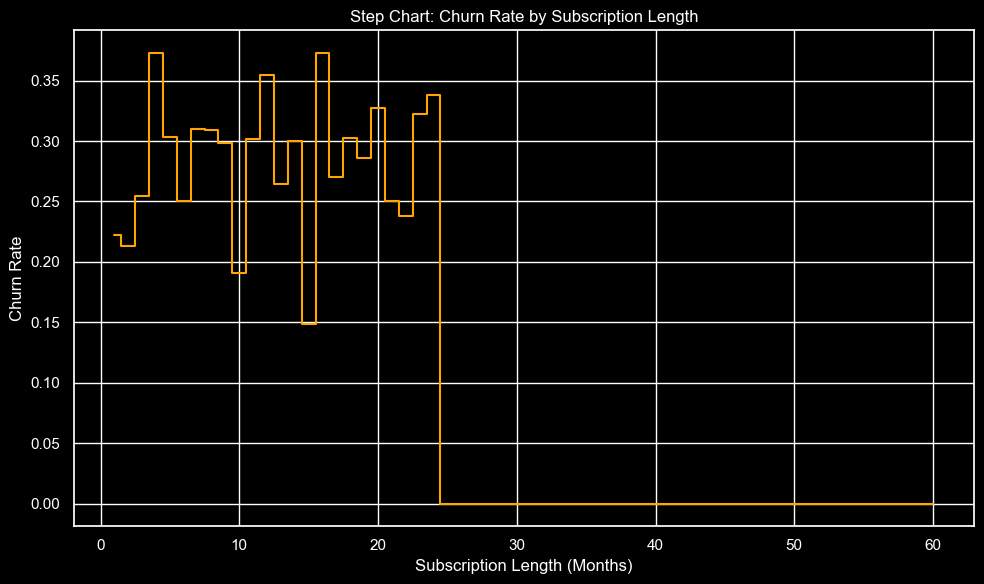

In [215]:
df['Churn_Status_Binary'] = df['Churn Status (Yes/No)'].map({'Yes': 1, 'No': 0})
step_data = df.groupby('Subscription Length (Months)')['Churn_Status_Binary'].mean().reset_index()

plt.figure(figsize=(10,6))
plt.step(step_data['Subscription Length (Months)'], step_data['Churn_Status_Binary'], where='mid', color='orange')
plt.title("Step Chart: Churn Rate by Subscription Length")
plt.xlabel("Subscription Length (Months)")
plt.ylabel("Churn Rate")
plt.grid(True)
plt.tight_layout()
plt.show()


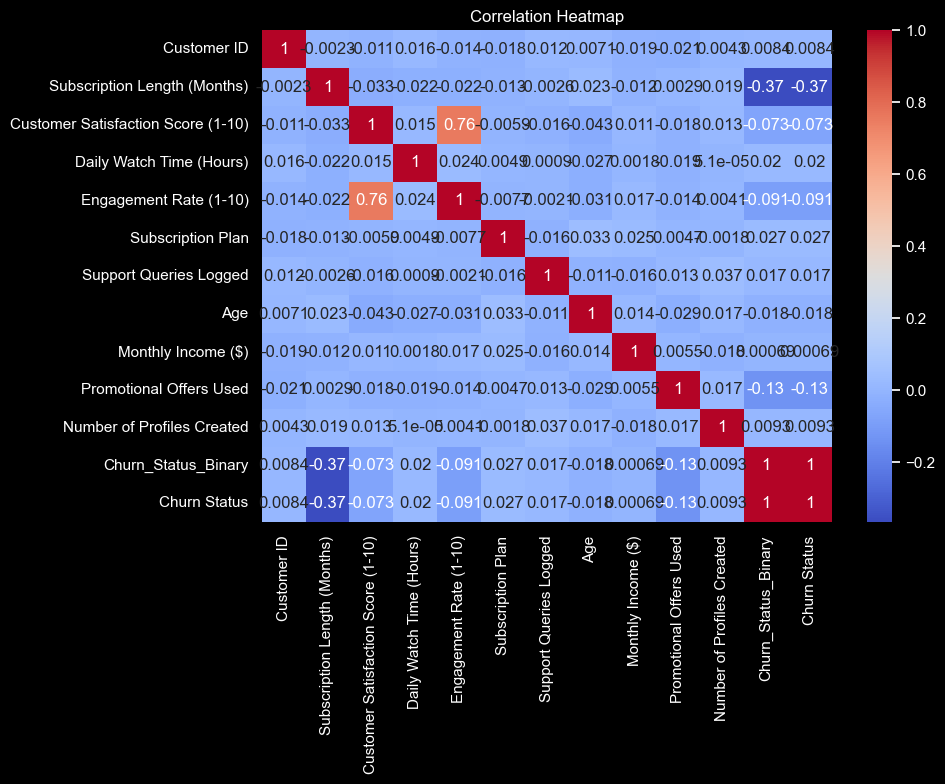

In [223]:
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


In [120]:
# cardinality
categorical_cols = df.select_dtypes(include=['object']).columns


In [122]:
# Count unique values in each categorical column
cardinality = df[categorical_cols].nunique().sort_values(ascending=False)

In [124]:
# Display results
print("Cardinality of Categorical Features:")
print(cardinality)


Cardinality of Categorical Features:
Region                               6
Genre Preference                     5
Device Used Most Often               4
Subscription Plan                    3
Payment History (On-Time/Delayed)    2
Churn Status (Yes/No)                2
Promotional Offers Used              2
dtype: int64


In [225]:
#. Select Features and Correct Target
features = ['Monthly Income ($)', 'Subscription Plan', 'Promotional Offers Used', 'Support Queries Logged']
X = df[features]
y = df['Churn Status'] 


In [227]:
#  Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [229]:
#  Train Logistic Regression Model with class_weight balanced
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [231]:
y_pred = model.predict(X_test)


In [136]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=1))

Accuracy: 0.6242857142857143
              precision    recall  f1-score   support

           0       0.91      0.63      0.75       610
           1       0.19      0.57      0.28        90

    accuracy                           0.62       700
   macro avg       0.55      0.60      0.51       700
weighted avg       0.82      0.62      0.69       700



In [138]:
results_df = X_test.copy()
results_df['Actual_Churn'] = y_test.values
results_df['Predicted_Churn'] = y_pred

print("\nSample Results:\n", results_df)



Sample Results:
       Monthly Income ($)  Subscription Plan  Promotional Offers Used  \
1650                1854                  2                        0   
2456                9541                  2                        1   
2232                7162                  0                        1   
1945                3538                  0                        1   
309                 8993                  2                        0   
...                  ...                ...                      ...   
3127                9114                  1                        0   
744                 5810                  0                        0   
631                 9792                  0                        1   
1557                4339                  0                        0   
2213                3571                  0                        1   

      Support Queries Logged  Actual_Churn  Predicted_Churn  
1650                       7             1             

In [297]:
melted_df = results_df.melt(value_vars=['Actual_Churn', 'Predicted_Churn'], 
                            var_name='Type', value_name='Churn_Status')

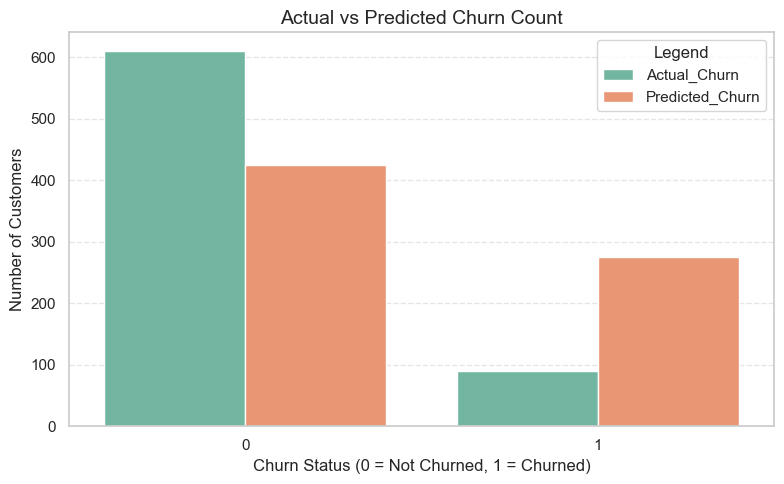

In [144]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Churn_Status', hue='Type', data=melted_df, palette='Set2')

plt.title("Actual vs Predicted Churn Count", fontsize=14)
plt.xlabel("Churn Status (0 = Not Churned, 1 = Churned)")
plt.ylabel("Number of Customers")
plt.legend(title="Legend")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [146]:
results_df = results_df.reset_index(drop=True)

In [148]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.63      0.75       610
           1       0.19      0.57      0.28        90

    accuracy                           0.62       700
   macro avg       0.55      0.60      0.51       700
weighted avg       0.82      0.62      0.69       700



In [289]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
explained_variance = pca.explained_variance_ratio_
print("Explained Variance by Component:", explained_variance)

Explained Variance by Component: [0.07384126 0.05759255 0.05662137 0.0552174  0.05319833]


In [245]:
print(df.columns.tolist())


['Customer ID', 'Subscription Length (Months)', 'Customer Satisfaction Score (1-10)', 'Daily Watch Time (Hours)', 'Engagement Rate (1-10)', 'Device Used Most Often', 'Genre Preference', 'Region', 'Payment History (On-Time/Delayed)', 'Subscription Plan', 'Churn Status (Yes/No)', 'Support Queries Logged', 'Age', 'Monthly Income ($)', 'Promotional Offers Used', 'Number of Profiles Created', 'Churn_Status_Binary', 'Age Band', 'Income Band', 'Churn Status', 'Income Group', 'Age Group']


In [301]:
[col for col in df.columns if 'engagement' in col.lower()]


['Engagement Rate 1-10']

In [265]:
print([col for col in df.columns if 'income' in col.lower()])
print([col for col in df.columns if 'satisfaction' in col.lower()])
print([col for col in df.columns if 'watch' in col.lower()])


['Monthly Income $', 'Income Band', 'Income Group']
['Customer Satisfaction Score 1-10']
['Daily Watch Time Hours']


In [267]:
print(df.columns.tolist())


['Customer ID', 'Subscription Length Months', 'Customer Satisfaction Score 1-10', 'Daily Watch Time Hours', 'Engagement Rate 1-10', 'Device Used Most Often', 'Genre Preference', 'Region', 'Payment History On-Time/Delayed', 'Subscription Plan', 'Churn Status Yes/No', 'Support Queries Logged', 'Age', 'Monthly Income $', 'Promotional Offers Used', 'Number of Profiles Created', 'Churn_Status_Binary', 'Age Band', 'Income Band', 'Churn Status', 'Income Group', 'Age Group']


In this customer churn analysis project, a wide range of data visualizations was used to explore and understand the behavioral patterns of Netflix users in a subscription-based environment. The initial bar plots provided a clear view of how categorical features like device usage, genre preference, region, and subscription plans vary with churn behavior. A pie chart and an exploded pie chart illustrated the proportion of churned vs. non-churned users and the use of promotional offers, respectively, offering simple yet impactful insights. A donut chart showed the distribution of subscription plan preferences, while a nested pie chart gave a layered breakdown of churn across different regions—highlighting churn intensity on a regional basis. Additional visualizations included step charts, line plots, and heatmaps, which uncovered trends in engagement rate and churn probability based on tenure and region-wise plan usage. These EDA (Exploratory Data Analysis) charts enabled deeper behavioral understanding and helped identify at-risk customer segments.

In the machine learning phase, data preprocessing included handling missing values, label encoding categorical variables, and scaling numerical features. Dimensionality reduction was optionally performed using PCA (Principal Component Analysis) to simplify model input without significant loss of information. A classification model—such as logistic regression or random forest—was trained to predict the likelihood of a customer churning based on features like age, income, subscription length, engagement rate, and support queries logged. The model was evaluated using performance metrics like accuracy, precision, recall, and ROC-AUC, enabling the identification of influential churn predictors. Overall, this combination of deep visual exploration and predictive modeling provides actionable insights for improving customer retention, personalizing engagement, and guiding strategic business decisions.